In [1]:
%matplotlib inline
from dwelf import *
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

filename = PACKAGEDIR + '/data/kappaCeti.csv'
kappa = ascii.read(filename)
t, y = kappa['time'], kappa['flux']
d2r = np.pi/180
nspots = 7

inc = np.array([30, 80]) * d2r
Peq = np.array([8.0, 10.5])
k2 = np.array([-.75, .75])
k4 = 0.
c1 = c3 = c4 = d1 = d3 = d4 = 0.
c2 = d2 = .684

alpha = np.array([[0, 30] for _ in range(nspots)]) * d2r
fspot = np.array([.22 for _ in range(nspots)])
tmax = np.array([t[0], t[0], t[419], t[419], t[419], t[700], t[700]])
life = np.array([100, 100, 100, 100, 100, 100, 100])
ingress = np.array([0, 0, 0, 0, 0, 0, 0])
egress = np.array([0, 0, 0, 0, 0, 0, 0])

U = np.array([[.99, 1.01], [.99, 1.015], [.99, 1.01]])
B = np.array([1, 1, 1])

tstart = np.array([1400, 1500, 2000])
tend = np.array([1500, 2000, 2200])

model = MaculaModeler(t, y, nspots, inc=inc, Peq=Peq, k2=k2, k4=k4, c1=c1, c2=c2,
                      c3=c3, c4=c4, d1=d1, d2=d2, d3=d3, d4=d4, alpha=alpha, fspot=fspot, tmax=tmax,
                      life=life, ingress=ingress, egress=egress, U=U, B=B, tstart=tstart, tend=tend)




In [2]:
opts, sses = model.minimize(n=50)
print(opts[0], sses[0])



[ 0.9135602  10.0496067  -0.51939964 -0.73982181 -1.81150441  2.01187174
 -1.2183667   3.00013985  1.22237056  2.730161   -0.90184474  0.98901542
  0.43730791  0.36485877 -1.06025236 -1.45886853  0.18911754  0.40454445
  0.05742409  0.14559805  0.11579131  0.17091941  0.46613069  0.09777178
  0.99156369  0.9900134   0.9947179 ] 11.279959543388632


11.279959543388632


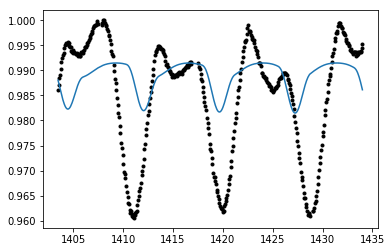

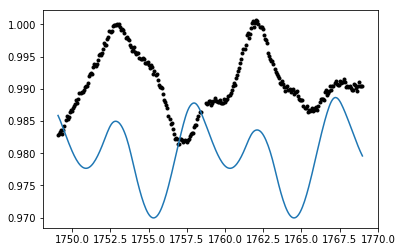

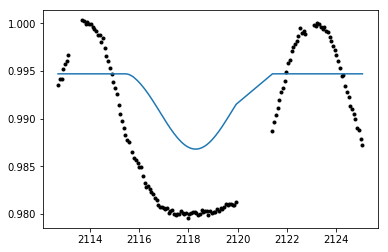

In [4]:
yf = model.predict(t, opts[0])
plt.figure()
plt.plot(t[:419], y[:419], 'k.')
plt.plot(t[:419], yf[:419])
plt.figure()
plt.plot(t[419:700], y[419:700], 'k.')
plt.plot(t[419:700], yf[419:700])
plt.figure()
plt.plot(t[700:], y[700:], 'k.')
plt.plot(t[700:], yf[700:])
print(model.chi(opts[0]))

1.28383173956138


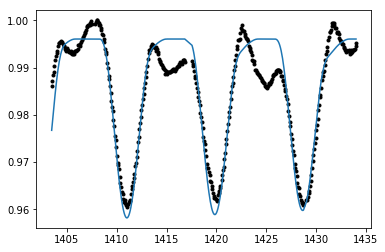

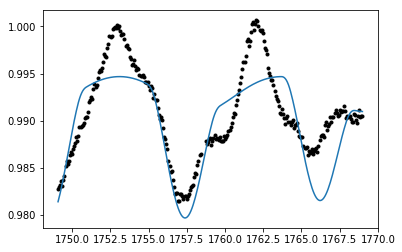

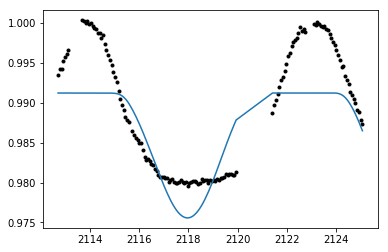

In [ ]:
result = model.multinest(verbose=True, outputfiles_basename='out2/')


1.28383173956138


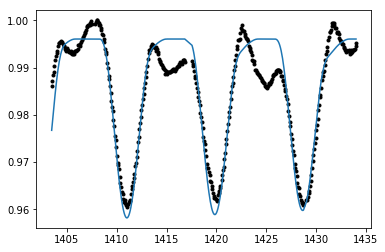

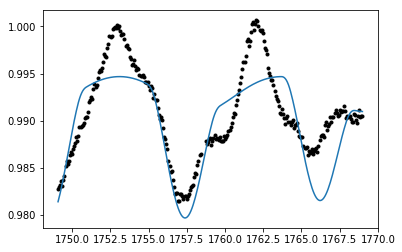

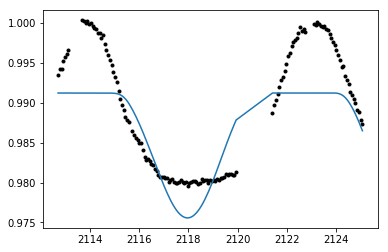

In [4]:
from pymultinest.analyse import Analyzer
a = Analyzer(27, outputfiles_basename='out2/')


1.28383173956138


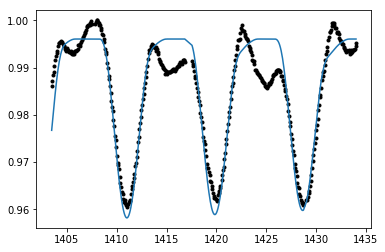

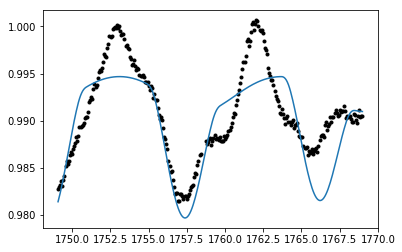

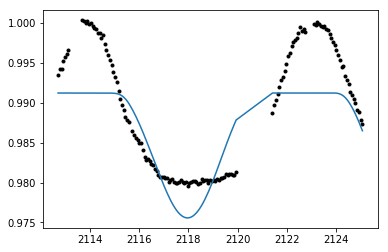

In [5]:
p = a.get_best_fit()['parameters']
yf = model.predict(t, p)
plt.figure()
plt.plot(t[:419], y[:419], 'k.')
plt.plot(t[:419], yf[:419])
plt.figure()
plt.plot(t[419:700], y[419:700], 'k.')
plt.plot(t[419:700], yf[419:700])
plt.figure()
plt.plot(t[700:], y[700:], 'k.')
plt.plot(t[700:], yf[700:])
print(model.chi(p))


0.530733227426733


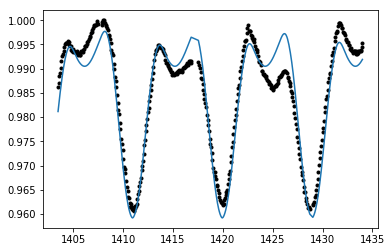

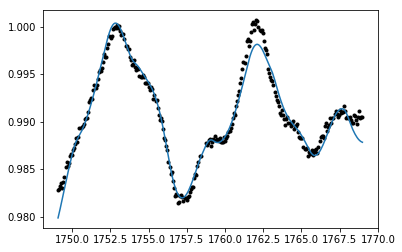

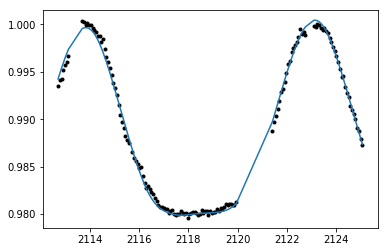

In [7]:
ans = [60.1*d2r, 8.785, .0868, 61*d2r, -106*d2r, 50.5*d2r, 155*d2r, -32*d2r, -164*d2r,
       65*d2r, 32*d2r, 36*d2r, 14*d2r, -47*d2r, 79*d2r, 60*d2r, 47*d2r, 11.8*d2r,
       5.9*d2r, 7.9*d2r, 17.1*d2r, 14.3*d2r, 10*d2r, 8.35*d2r, 1.00105, 1.01916, 1.00449]
yf = model.predict(t, ans)
plt.figure()
plt.plot(t[:419], y[:419], 'k.')
plt.plot(t[:419], yf[:419])
plt.figure()
plt.plot(t[419:700], y[419:700], 'k.')
plt.plot(t[419:700], yf[419:700])
plt.figure()
plt.plot(t[700:], y[700:], 'k.')
plt.plot(t[700:], yf[700:])
print(model.chi(ans))
